# Process :
    - DATA PREPROCESS 
    - SELECT MODELS 
    - FEATURE ENGINEERING 
    - PREDICTION ENSEMBLE 

#  Model :  
    - GROUP A : LINEAR + SVR
    - GROUP B : LINEAR + DECISION TREE (RANDOM FOREST)
    
# Ref :


- https://www.kaggle.com/orgesleka/used-cars-database
- https://www.slideshare.net/changecandy/cm-kaggletw-share


# =========================================================

In [271]:
# Load basics library 

import pandas as pd, numpy as np
%matplotlib inline
%pylab inline
import seaborn  as sns 
import pylab as pl
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# * Data Preprocess 

In [272]:
# load car csv 

df = pd.read_csv('/Users/yennanliu/Desktop/used-cars-database/autos.csv' ,encoding = "ISO-8859-1" )

In [273]:
df = df.drop(['nrOfPictures','postalCode','abtest'], axis=1)

- Drop columns :  nrOfPictures, postalCode, abtest 
   - nrOfPictures  are all 0 
   - postalCode is not related to car price apparently
   - abtest has no description

In [274]:
df = df[(df.price < 150000) & (df.price > 100) ]

- Drop extreme big / small / unusual price data points

In [275]:
df = df[(df.yearOfRegistration > 1900) & (df.yearOfRegistration < 2016) ]

- Remove no sense yearOfRegistration data points , > 1900 for possible earlist register time, and < 2016 based on lastSeen column

In [276]:
df = df[(df.powerPS > 50) & (df.powerPS < 1000) ]

- Cleaning up the powerPS

In [277]:
# transform string to timestamp 

df.dateCrawled = pd.to_datetime(df.dateCrawled)
df.dateCreated = pd.to_datetime(df.dateCreated)
df.lastSeen = pd.to_datetime(df.lastSeen)

In [278]:
# create new feature : "time_online" by differences in days among lastseen and datesreated

df['time_online'] = (df.lastSeen - df.dateCreated).apply(lambda x: int(x.days))

- time_online :  how long such car object exist on ebay website

In [279]:
#max(df.dateCrawled)

In [280]:
# CHECK features correlation

corr = df.corr()
corr.loc[:,'price'].abs().sort_values(ascending=False)[1:]

powerPS                0.577832
kilometer              0.446202
yearOfRegistration     0.425019
time_online            0.127058
monthOfRegistration    0.042432
Name: price, dtype: float64

In [287]:
selected_feature = ['price',
                    'powerPS',
                    'kilometer',
                    'yearOfRegistration',
                    'time_online',
                    'monthOfRegistration']

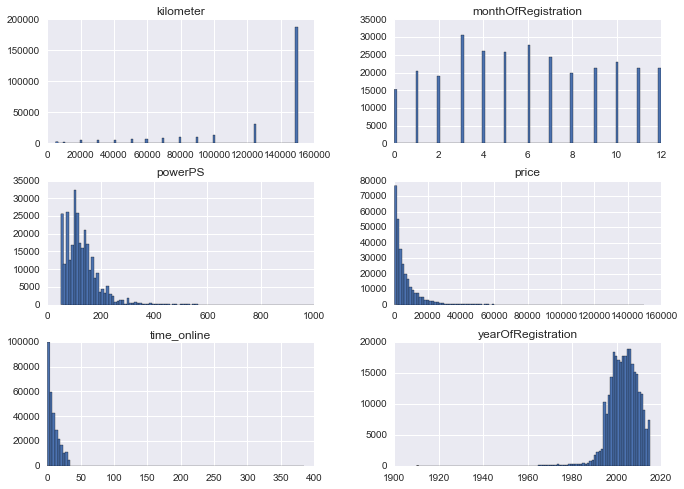

In [282]:
#df_train.info()
df.hist(bins=100, figsize=(11,8))
plt.show()

##  After data preprocess,  get prepared data sample :  


In [288]:
print ('car sample counts :' , len(df))
print ('seleceted feature :' , selected_feature)

car sample counts : 295345
seleceted feature : ['price', 'powerPS', 'kilometer', 'yearOfRegistration', 'time_online', 'monthOfRegistration']
